# **RAISE 2024** #

**COMPETITION OVERVIEW**

Does News Media Spread Fear of AI?

Discovering dominant themes in media coverage of AI by analyzing news headlines.

**TASK**

1. Analyze these headlines to uncover the narratives surrounding AI in the media

2. Use analytical text analytics and natural language processing (NLP) techniques to extract meaningful insights from these headlines

3. Generate innovative data supported insights that deepen our understanding of media dynamics, promoting a more informed and empowered public discourse on AI.

**WORKFLOW OF THIS NOTEBOOK**

1. Data Loading and Exploration
2. Text Preprocessing
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. Topic Modeling and Theme Synthesis
6. Insight Generation and Recommendations

This notebook is inspired, adapted, modified, and combined from several existing sentiment analysis projects, including but not limited to the following:

[Kaggle](https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook)

[FA23_ML_for_Sentiment_Classification](https://drive.google.com/file/d/1s1QsYx9Ri5DrGU6dp42aJr-Gr-AO59Us/view?usp=sharing)

[Python](https://pypi.org)

[github](https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM?tab=readme-ov-file)

And with the help of ChatGPT

In [ ]:
%pwd

'/content'

# **1. Data Loading Exploration** #
+ Load the dataset
+ Explore the dataset to understand its structure, features, and content
+ Check for any missing values or inconsistencies in the data

In [ ]:
!pip install lmfit

In [ ]:
pip install tabulate

In [ ]:
# some basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from lmfit import Model
import statsmodels.api as sm
from tabulate import tabulate
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [ ]:
!pwd

/content


In [ ]:
# Read the Excel file (replace 'Dataset_3.5k.xlsx' with the actual filename)
df_og = pd.read_csv('Dataset_3.5k.csv')

# show some basic info
display(df_og.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       3500 non-null   object
 1   link                        3500 non-null   object
 2   date                        3500 non-null   object
 3   source                      3500 non-null   object
 4   country                     3500 non-null   object
 5   language                    3500 non-null   object
 6   translated_title            3500 non-null   object
 7   number_of_characters_title  3500 non-null   int64 
 8   number_of_words_title       3500 non-null   int64 
 9   day_of_week                 3500 non-null   object
 10  month                       3500 non-null   int64 
 11  year                        3500 non-null   int64 
 12  quarter                     3500 non-null   int64 
 13  is_weekend                  3500 non-null   bool

None

In [ ]:
# Read the Excel file (replace 'Dataset_3.5k.xlsx' with the actual filename)
df_og = pd.read_csv('Dataset_3.5k.csv')

# show some basic info
display(df_og.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       3500 non-null   object
 1   link                        3500 non-null   object
 2   date                        3500 non-null   object
 3   source                      3500 non-null   object
 4   country                     3500 non-null   object
 5   language                    3500 non-null   object
 6   translated_title            3500 non-null   object
 7   number_of_characters_title  3500 non-null   int64 
 8   number_of_words_title       3500 non-null   int64 
 9   day_of_week                 3500 non-null   object
 10  month                       3500 non-null   int64 
 11  year                        3500 non-null   int64 
 12  quarter                     3500 non-null   int64 
 13  is_weekend                  3500 non-null   bool

None

In [ ]:
df_og.columns
# for copying col names easier

Index(['title', 'link', 'date', 'source', 'country', 'language',
       'translated_title', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'is_holiday', 'source_type', 'final_redirected_URL',
       'domain_of_URL', 'subdomain_of_URL', 'URL_depth', 'top_level_domain',
       'url_length', 'author'],
      dtype='object')

In [ ]:
# rename and drop other columns
# rename 'title' to 'News Article'
df_news = df_og.rename(columns={'title':'News Article'})
df_news.head()

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,True,False,News Outlet,https://www.aninews.in/news/world/middle-east/...,www.aninews.in,www,4,in,128,[]
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,False,True,Press Release Service,https://nationalmortgageprofessional.com/news/...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart']
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,False,False,News Outlet,https://seattlespectator.com/2023/10/04/how-th...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']"
3,Telex : Le code source du ransomware HelloKitt...,https://news.google.com/rss/articles/CBMiwgFod...,2023-10-09,Le Monde Informatique,US,fr,Telex: HelloKitty ransomware source code revea...,129,22,Monday,...,False,True,Other,https://www.lemondeinformatique.fr/actualites/...,www.lemondeinformatique.fr,www,2,fr,194,[]
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,Is AI a Master or Slave? - Namibian,28,8,Tuesday,...,False,False,Other,https://www.namibian.com.na/is-ai-a-master-or-...,www.namibian.com.na,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He..."


In [ ]:
# create a df with title only
# drop all columns except 'News Article'
df_news_title = df_news.drop(columns=['link', 'date', 'source', 'country', 'language',
       'translated_title', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'is_holiday', 'source_type', 'final_redirected_URL',
       'domain_of_URL', 'subdomain_of_URL', 'URL_depth', 'top_level_domain',
       'url_length', 'author'])
# show it
for sentence in df_news_title['News Article'][:10]:
    for char in sentence:
        print(char, end='')
    print()

Iran uses Artificial Intelligence for maximizing suppression: Experts - ANI News
Mortgage Lenders See AI As Key To Operational Efficiency - National Mortgage Professional
How the Threat of AI Coincided with the Writers' Strike - The Spectator
Telex : Le code source du ransomware HelloKitty dévoilé, L'UE s'intéresse à Bing et iMessage, Nucleus AI lance un LLM pour l'agriculture - Le Monde Informatique
Is AI a Master or Slave? - Namibian
Artificial Intelligence Meets CRISPR: The Rise of Precision RNA ... - SciTechDaily
Sunak's AI summit scores 'diplomatic coup' but exposes global ... - Financial Times
10 Pekerjaan Manusia yang Tidak Bisa Digantikan Robot AI - klikbekasi.co
US Calling: New Jersey gets Swaminarayan Akshardham Temple, GPT-4 hires worker to complete task, President Biden’s executive order on AI, and the Bletchley Declaration - The Indian Express
Mega-guía de IA gratis: 45 herramientas de inteligencia artificial sin coste para ayudarte con todo tipo... - Xataka


In [ ]:
# check for null
if (df_news_title.isnull().values.any() == False):
    print('No missing value found in data')
else:
    print('MISSING VALUE IN DATA')

No missing value found in data


In [ ]:
# optional, save comment only file
# df_comment.to_csv('ChatGPT - comment only.csv', index = False)

In [ ]:
# convert cleaned df to list for cleaning and passing into ML later
news_list = df_news['News Article'].tolist()
news_list[:5]

['Iran uses Artificial Intelligence for maximizing suppression: Experts - ANI News',
 'Mortgage Lenders See AI As Key To Operational Efficiency - National Mortgage Professional',
 "How the Threat of AI Coincided with the Writers' Strike - The Spectator",
 "Telex : Le code source du ransomware HelloKitty dévoilé, L'UE s'intéresse à Bing et iMessage, Nucleus AI lance un LLM pour l'agriculture - Le Monde Informatique",
 'Is AI a Master or Slave? - Namibian']

In [ ]:
# convert cleaned df to list for cleaning and passing into ML later
news_title_list = df_news['News Article'].tolist()
news_title_list[:5]

['Iran uses Artificial Intelligence for maximizing suppression: Experts - ANI News',
 'Mortgage Lenders See AI As Key To Operational Efficiency - National Mortgage Professional',
 "How the Threat of AI Coincided with the Writers' Strike - The Spectator",
 "Telex : Le code source du ransomware HelloKitty dévoilé, L'UE s'intéresse à Bing et iMessage, Nucleus AI lance un LLM pour l'agriculture - Le Monde Informatique",
 'Is AI a Master or Slave? - Namibian']

step summary:
+ variables:
1. df_news
2. df_news_title
3. news_list
4. news_title_list

# **2. Text Preprocessing** #
+ Non English text removal
+ Contraction Expansion
+ Lowercasing the text.
+ Tokenization and removing stopwords (common words like 'and', 'the', 'is', etc.).
+ Lemmatization or stemming to reduce words to their base or root form.
+ Removing punctuation, special characters, and numbers.


### Non English Text Removal
+ this step is important because we only analyze English text, having non English text might affect the outcomes

In [ ]:
# check what languages there are in the dataset
df_news['language'].value_counts()

language
en       2918
ko        143
es         67
ja         65
fr         41
id         40
vi         28
pt         22
de         20
it         20
pl         15
nl         13
zh-cn      11
ru         11
hi          7
no          6
th          6
zh          6
ro          6
uk          6
el          5
cs          5
et          5
te          3
hr          3
ca          3
fa          3
sv          3
da          2
tr          2
ml          2
ar          2
pa          1
sr          1
iw          1
sk          1
mr          1
fi          1
so          1
tl          1
sw          1
bg          1
gu          1
Name: count, dtype: int64

In [ ]:
# seperate English and Non English titles
df_english = df_news[df_news['language'] == 'en']
df_non_english = df_news[df_news['language'] != 'en']

In [ ]:
df_english.head(3)

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,True,False,News Outlet,https://www.aninews.in/news/world/middle-east/...,www.aninews.in,www,4,in,128,[]
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,False,True,Press Release Service,https://nationalmortgageprofessional.com/news/...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart']
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,False,False,News Outlet,https://seattlespectator.com/2023/10/04/how-th...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']"


In [ ]:
df_non_english.head(3)

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_weekend,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author
3,Telex : Le code source du ransomware HelloKitt...,https://news.google.com/rss/articles/CBMiwgFod...,2023-10-09,Le Monde Informatique,US,fr,Telex: HelloKitty ransomware source code revea...,129,22,Monday,...,False,True,Other,https://www.lemondeinformatique.fr/actualites/...,www.lemondeinformatique.fr,www,2,fr,194,[]
7,10 Pekerjaan Manusia yang Tidak Bisa Digantika...,https://news.google.com/rss/articles/CBMiV2h0d...,2023-11-04,klikbekasi.co,US,id,10 Human Jobs That Cannot Be Replaced by AI Ro...,55,11,Saturday,...,True,False,Other,https://klikbekasi.co/listing/10-pekerjaan-man...,klikbekasi.co,klikbekasi,3,co,87,[]
9,Mega-guía de IA gratis: 45 herramientas de int...,https://news.google.com/rss/articles/CBMifmh0d...,2023-05-06,Xataka,US,es,Free AI mega-guide: 45 free artificial intelli...,81,16,Saturday,...,True,False,Other,https://www.xataka.com/basics/mega-guia-ia-gra...,www.xataka.com,www,2,com,126,"['Yúbal Fernández', 'Publicaciones De Yúbal Fe..."


alternative for removing non English sentences:

add another function on top of detect_language to translate them into English

### Contraction Expansion

In [ ]:
english_list = df_english['News Article'].tolist()

In [ ]:
# expand contraction in sentences for better testing result
!pip install contractions
import contractions

# define contraction expanding function
def expand_contractions(sentence):
    expanded_sentence = contractions.fix(sentence)
    return expanded_sentence

expanded_comment_list = [expand_contractions(sentence) for sentence in english_list]
expanded_comment_list[:5]

['Iran uses Artificial Intelligence for maximizing suppression: Experts - ANI News',
 'Mortgage Lenders See AI As Key To Operational Efficiency - National Mortgage Professional',
 "How the Threat of AI Coincided with the Writers' Strike - The Spectator",
 'Is AI a Master or Slave? - Namibian',
 'Artificial Intelligence Meets CRISPR: The Rise of Precision RNA ... - SciTechDaily']

### Lower Case Conversion
+ this step is important since capitalized words cannot be removed with Stopwords Removal

In [ ]:
# Convert every word into lowercase
lowercased_comment_list = [' '.join(word.lower() for word in sentence.split()) for sentence in expanded_comment_list]
lowercased_comment_list[:5]

['iran uses artificial intelligence for maximizing suppression: experts - ani news',
 'mortgage lenders see ai as key to operational efficiency - national mortgage professional',
 "how the threat of ai coincided with the writers' strike - the spectator",
 'is ai a master or slave? - namibian',
 'artificial intelligence meets crispr: the rise of precision rna ... - scitechdaily']

### Tokenization and Stopwords Removal

import stopwords example
    
      import nltk
      from nltk.corpus import stopwords
      nltk.download('stopwords')
      print(stopwords.words('english'))

In [ ]:
# Tokenization and stopwords removal
# modified from Chatgpt generated solution
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt') # imported since this step broke without it
nltk.download('stopwords')

# tokenization of lowercased_comment_list
words_tokened = [word_tokenize(sentence) for sentence in lowercased_comment_list]

# select and use English stopwords
stop_words = set(stopwords.words('english'))

# fliter out all stopwords in words_tokened, which are all from lowercased_comment_list
comment_no_stopwords_list = [[w for w in word_token if not w in stop_words] for word_token in words_tokened]

print('---'*80)
# print the all stopwords in nltk's stopwords package
print('NLTK stopwords word:')
print(stop_words)

# compare results before and after removing stopwords ↓
print('\nPre stopwords removal Comment:')
for wordtokens in words_tokened[:5]:
    print(wordtokens)

print('\nPost stopwords removal Comment:')
for wordtokens in comment_no_stopwords_list[:5]:
    print(wordtokens)
print('---'*80)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
NLTK stopwords word:
{"don't", 'but', "you've", 'again', 'about', 'not', 'hasn', 'his', 'did', 'which', 't', 'won', 'few', 'what', 'o', 'who', 'to', 'most', 'other', 'during', 'own', 'after', 'down', 'weren', 'didn', "you'll", 'both', 'mustn', 'where', 'being', 'we', 'why', "weren't", 'into', 'a', 'they', 'too', 'can', "you're", 'for', 'an', 'she', 'then', 'ours', 'them', 'there', 'its', 'd', 'itself', 'you', "it's", "shouldn't", 'were', 'himself', "that'll", 'has', 'against', 've', "wasn't", 'until', 'hers', 'their', 'of', 'these', 'my', 'now', 'between', 'ma', "mustn't", 'on', 'am', 'once', "doesn't", 'here', 'more', 'this', 'hadn', 'under', "needn't", 'themselves', 'just', "shan't", 'over', 's', 'couldn', 'our', 'it', 'her', 'myself', 'him', 'you

In [ ]:
type(stopwords)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [ ]:
# reconstruct sentences for lemmatization
comment_reconstructed_list_1 = [' '.join(words) for words in comment_no_stopwords_list]
print('↓ Post stopwords removal sentence reconstruction ↓')
for sentence in comment_reconstructed_list_1[:5]:
    print(sentence)

↓ Post stopwords removal sentence reconstruction ↓
iran uses artificial intelligence maximizing suppression : experts - ani news
mortgage lenders see ai key operational efficiency - national mortgage professional
threat ai coincided writers ' strike - spectator
ai master slave ? - namibian
artificial intelligence meets crispr : rise precision rna ... - scitechdaily


### Lemmatization

In [ ]:
# lemmatization with spacy
# adopted from in class notebook: NLP Basics
import spacy
nlp = spacy.load("en_core_web_sm")

lemmatized_comment_list = []
for sentence in comment_reconstructed_list_1:
    doc = nlp(sentence)
    lemmatized_sentence = [token.lemma_ for token in doc]
    lemmatized_comment_list.append(lemmatized_sentence)
# show first five
for sentence in lemmatized_comment_list[:5]:
    print(sentence)

['iran', 'use', 'artificial', 'intelligence', 'maximizing', 'suppression', ':', 'expert', '-', 'ani', 'news']
['mortgage', 'lender', 'see', 'ai', 'key', 'operational', 'efficiency', '-', 'national', 'mortgage', 'professional']
['threat', 'ai', 'coincide', 'writer', "'", 'strike', '-', 'spectator']
['ai', 'master', 'slave', '?', '-', 'namibian']
['artificial', 'intelligence', 'meet', 'crispr', ':', 'rise', 'precision', 'rna', '...', '-', 'scitechdaily']


In [ ]:
# reconstruct sentences again for stemming
comment_reconstructed_list_2 = [' '.join(words) for words in lemmatized_comment_list]
print('↓ Post stopwords removal, lemmatization sentence reconstruction ↓')
for sentence in comment_reconstructed_list_2[:5]:
    print(sentence)

↓ Post stopwords removal, lemmatization sentence reconstruction ↓
iran use artificial intelligence maximizing suppression : expert - ani news
mortgage lender see ai key operational efficiency - national mortgage professional
threat ai coincide writer ' strike - spectator
ai master slave ? - namibian
artificial intelligence meet crispr : rise precision rna ... - scitechdaily


### Stemming

In [ ]:
# stemming
from nltk.stem import PorterStemmer
# word_tokenized is already installed in previous step
# from nltk.tokenize import word_tokenize

porter_stemmer = PorterStemmer()

stemmed_comment_list = [' '.join(porter_stemmer.stem(word) for word in word_tokenize(sentence)) for sentence in comment_reconstructed_list_1]
for sentence in stemmed_comment_list[:5]:
    print(sentence)

iran use artifici intellig maxim suppress : expert - ani news
mortgag lender see ai key oper effici - nation mortgag profession
threat ai coincid writer ' strike - spectat
ai master slave ? - namibian
artifici intellig meet crispr : rise precis rna ... - scitechdaili


### Puncuation Removal

In [ ]:
# punctuation like '?' '...' occurs frequently in the text
# remove them with tools in string
import string

# define a function to remove punctuation from each sentence
def remove_punctuation(sentence):
    return ''.join(char for char in sentence if char not in string.punctuation)

comment_cleaned_list = [remove_punctuation(sentence) for sentence in stemmed_comment_list]

# Print the result
for sentence in comment_cleaned_list[:5]:
    print(sentence)

iran use artifici intellig maxim suppress  expert  ani news
mortgag lender see ai key oper effici  nation mortgag profession
threat ai coincid writer  strike  spectat
ai master slave   namibian
artifici intellig meet crispr  rise precis rna   scitechdaili


In [ ]:
# convert cleaned comments back to a panda dataframe
# name the column title to 'Comment'
df_comment_cleaned = pd.DataFrame(comment_cleaned_list, columns = ['Comment'])
df_comment_cleaned.head()

,Comment
0,iran use artifici intellig maxim suppress exp...
1,mortgag lender see ai key oper effici nation ...
2,threat ai coincid writer strike spectat
3,ai master slave namibian
4,artifici intellig meet crispr rise precis rna...


**Possible improvment to the cleaning process:**
+ not reconstructing tokened words back to sentences in between steps for better runtime

# **3. Sentiment Analysis** #
+ Utilize machine learning models, lexicon-based approaches, or pre-trained language models (like BERT or GPT) for sentiment analysis.
+ Compare the sentiment analysis results with human scoring or ground truth if available.
+ Identify interesting cases, clusters, or patterns in sentiment polarity.

## SA No.1 - VADER
#### VADER - Valence Aware Dictionary and Sentiment Reasoner
nltk pre-built tool: Sentiment Intensity Analyzer

In [ ]:
# basic SA with nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_comment_cleaned.loc[0]

Comment    iran use artifici intellig maxim suppress  exp...
Name: 0, dtype: object

In [ ]:
df_comment_cleaned['Comment'][0]

'iran use artifici intellig maxim suppress  expert  ani news'

In [ ]:
# SA with SIA example: analyzing first entry/row from 'Comment'
SIA.polarity_scores(df_comment_cleaned['Comment'][0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
# define a function to run SIA.polarity_scores through entire df
def SIA_analyze(text):
    SIA_sentiment_scores = SIA.polarity_scores(text)
    return SIA_sentiment_scores

### test on uncleaned testing dataset

In [ ]:
# make a copy of df_test and save SIA results in it
df_SA1 = df_english.copy()
# run SIA_analyze function on copy with apply method
df_SA1[['negative','neutral','positive','compound']] = df_english['News Article'].apply(lambda x: pd.Series(SIA_analyze(x)))
df_SA1.head()

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,negative,neutral,positive,compound
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,www.aninews.in,www,4,in,128,[],0.000,0.744,0.256,0.4767
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart'],0.000,0.815,0.185,0.3612
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']",0.329,0.671,0.000,-0.5994
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,Is AI a Master or Slave? - Namibian,28,8,Tuesday,...,www.namibian.com.na,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He...",0.000,1.000,0.000,0.0000
5,Artificial Intelligence Meets CRISPR: The Rise...,https://news.google.com/rss/articles/CBMidmh0d...,2023-07-03,SciTechDaily,US,en,Artificial Intelligence Meets CRISPR: The Rise...,71,12,Monday,...,scitechdaily.com,scitechdaily,2,com,118,['Columbia University'],0.000,0.763,0.237,0.4767


In [ ]:
# determine overall sentiment of each sentence base on values in 'compound' column
# add to df_SA1 with column name 'Sentiment'
df_SA1['Sentiment'] = df_SA1['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))
df_SA1.head()

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,negative,neutral,positive,compound,Sentiment
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,www,4,in,128,[],0.000,0.744,0.256,0.4767,Positive
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,nationalmortgageprofessional,2,com,96,['Christine Stuart'],0.000,0.815,0.185,0.3612,Positive
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']",0.329,0.671,0.000,-0.5994,Negative
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,Is AI a Master or Slave? - Namibian,28,8,Tuesday,...,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He...",0.000,1.000,0.000,0.0000,Neutral
5,Artificial Intelligence Meets CRISPR: The Rise...,https://news.google.com/rss/articles/CBMidmh0d...,2023-07-03,SciTechDaily,US,en,Artificial Intelligence Meets CRISPR: The Rise...,71,12,Monday,...,scitechdaily,2,com,118,['Columbia University'],0.000,0.763,0.237,0.4767,Positive


### test on cleaned testing dataset

In [ ]:
# repeat steps above
df_SA1_1 = df_comment_cleaned.copy()
df_SA1_1[['negative','neutral','positive','compound']] = df_comment_cleaned['Comment'].apply(lambda x: pd.Series(SIA_analyze(x)))

# Use the compound score directly from df_SA1_1
df_SA1_1['Sentiment'] = df_SA1_1['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Add the 'date' column from df_SA1 to df_SA1_1
df_SA1_1['date'] = df_SA1['date']

df_SA1_1.head()

,Comment,negative,neutral,positive,compound,Sentiment,date
0,iran use artifici intellig maxim suppress exp...,0.000,1.000,0.0,0.0000,Neutral,2023-05-07
1,mortgag lender see ai key oper effici nation ...,0.000,1.000,0.0,0.0000,Neutral,2023-10-09
2,threat ai coincid writer strike spectat,0.551,0.449,0.0,-0.5994,Negative,2023-10-04
3,ai master slave namibian,0.000,1.000,0.0,0.0000,Neutral,NaN
4,artifici intellig meet crispr rise precis rna...,0.000,1.000,0.0,0.0000,Neutral,2023-10-03


### SA NO.1 Results Scatter Plot with Trend Line

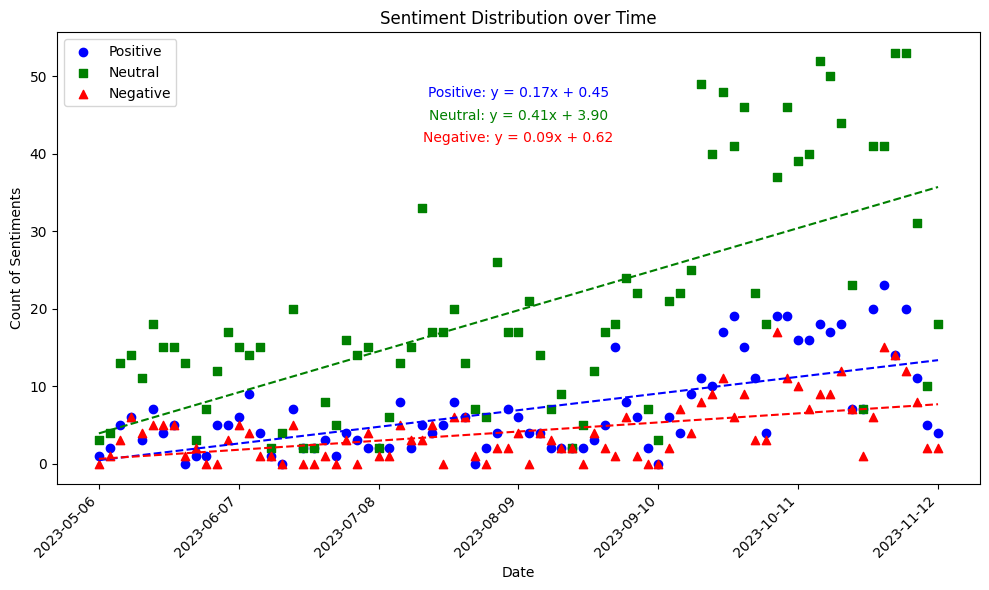

In [ ]:
# Group by date and calculate the sentiment counts
sentiment_counts = df_SA1_1.groupby('date')['Sentiment'].value_counts().unstack().fillna(0)

# Fit linear regression models for each sentiment category
x = np.arange(len(sentiment_counts)).reshape(-1, 1)

# Fit model for positive sentiment
model_positive = LinearRegression().fit(x, sentiment_counts['Positive'].values.reshape(-1, 1))

# Fit model for neutral sentiment
model_neutral = LinearRegression().fit(x, sentiment_counts['Neutral'].values.reshape(-1, 1))

# Fit model for negative sentiment
model_negative = LinearRegression().fit(x, sentiment_counts['Negative'].values.reshape(-1, 1))

# Plot the scatter plot with trend lines
plt.figure(figsize=(10, 6))

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = sentiment_counts.index[::len(sentiment_counts) // num_dates_to_display]

# Scatter plot for positive sentiment
plt.scatter(sentiment_counts.index, sentiment_counts['Positive'], color='blue', label='Positive', marker='o')
plt.plot(sentiment_counts.index, model_positive.predict(x), color='blue', linestyle='--')

# Scatter plot for neutral sentiment
plt.scatter(sentiment_counts.index, sentiment_counts['Neutral'], color='green', label='Neutral', marker='s')
plt.plot(sentiment_counts.index, model_neutral.predict(x), color='green', linestyle='--')

# Scatter plot for negative sentiment
plt.scatter(sentiment_counts.index, sentiment_counts['Negative'], color='red', label='Negative', marker='^')
plt.plot(sentiment_counts.index, model_negative.predict(x), color='red', linestyle='--')

# Display equations for trend lines in the middle
plt.text(0.5, 0.85, f'Positive: y = {model_positive.coef_[0][0]:.2f}x + {model_positive.intercept_[0]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='blue')
plt.text(0.5, 0.80, f'Neutral: y = {model_neutral.coef_[0][0]:.2f}x + {model_neutral.intercept_[0]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='green')
plt.text(0.5, 0.75, f'Negative: y = {model_negative.coef_[0][0]:.2f}x + {model_negative.intercept_[0]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='center', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count of Sentiments')
plt.title('Sentiment Distribution over Time')
plt.xticks(selected_dates, rotation=45, ha='right')  # Rotate the labels for better readability
plt.legend()

# Move the legend to the upper left corner
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Fit linear regression models for each sentiment category
x = np.arange(len(sentiment_counts)).reshape(-1, 1)
x_with_const = sm.add_constant(x)  # Add a constant for the intercept term

# Fit model for positive sentiment
model_positive = sm.OLS(sentiment_counts['Positive'], x_with_const)
result_positive = model_positive.fit()

# Get the summary table as text for the positive sentiment model
summary_text_positive = result_positive.summary().as_text()

# Fit model for neutral sentiment
model_neutral = sm.OLS(sentiment_counts['Neutral'], x_with_const)
result_neutral = model_neutral.fit()

# Get the summary table as text for the neutral sentiment model
summary_text_neutral = result_neutral.summary().as_text()

# Fit model for negative sentiment
model_negative = sm.OLS(sentiment_counts['Negative'], x_with_const)
result_negative = model_negative.fit()

# Get the summary table as text for the negative sentiment model
summary_text_negative = result_negative.summary().as_text()

# Print the summary table for the positive sentiment model
print("Summary table for Positive Sentiment Model:")
print(summary_text_positive)

# Print the summary table for the neutral sentiment model
print("Summary table for Neutral Sentiment Model:")
print(summary_text_neutral)

# Print the summary table for the negative sentiment model
print("Summary table for Negative Sentiment Model:")
print(summary_text_negative)

Summary table for Positive Sentiment Model:
                            OLS Regression Results                            
Dep. Variable:               Positive   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     52.69
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.68e-10
Time:                        17:31:16   Log-Likelihood:                -231.97
No. Observations:                  79   AIC:                             467.9
Df Residuals:                      77   BIC:                             472.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

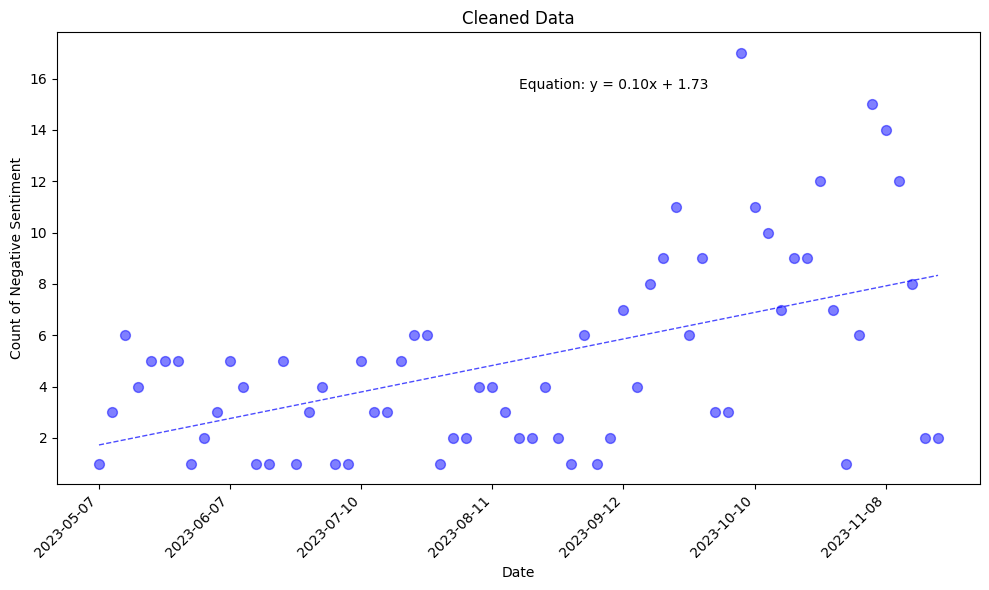

In [ ]:
# Determine negative sentiment occurrences for each date
negative_counts = df_SA1_1[df_SA1_1['Sentiment'] == 'Negative']['date'].value_counts().sort_index()

# Fit a linear regression model - Second DataFrame
x = np.array(range(len(negative_counts))).reshape(-1, 1)
y = negative_counts.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate R-squared
r_squared = model.score(x, y)

# Set up the figure and subplots for scatter plots and summary tables
plt.figure(figsize=(10, 6))

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = negative_counts.index[::len(negative_counts) // num_dates_to_display]

# Plot DataFrame
plt.scatter(negative_counts.index, negative_counts.values, s=50, alpha=0.5, c='blue')
plt.xlabel('Date')
plt.ylabel('Count of Negative Sentiment')
plt.title('Cleaned Data')

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = negative_counts.index[::len(negative_counts) // num_dates_to_display]

# Set x-axis ticks
plt.xticks(selected_dates, rotation=45, ha='right')  # Rotate the labels for better readability

# Plot the trend line with equation
plt.plot(negative_counts.index, model.predict(x), color='blue', linewidth=1, alpha=0.7, linestyle='--')
plt.text(0.5, 0.9, f'Equation: y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
# Fit a linear regression model
x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const)
result = model.fit()

# Get the summary table as text for the second DataFrame
summary_text = result.summary().as_text()

# Split the summary table by lines
summary_lines = summary_text.split('\n')

# Print the lines of the summary table for the second DataFrame
for line in summary_lines:
    print(line)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     22.86
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           1.09e-05
Time:                        02:22:00   Log-Likelihood:                -168.15
No. Observations:                  65   AIC:                             340.3
Df Residuals:                      63   BIC:                             344.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7273      0.801      2.156      0.0

### SA NO.1 Results Line Graph

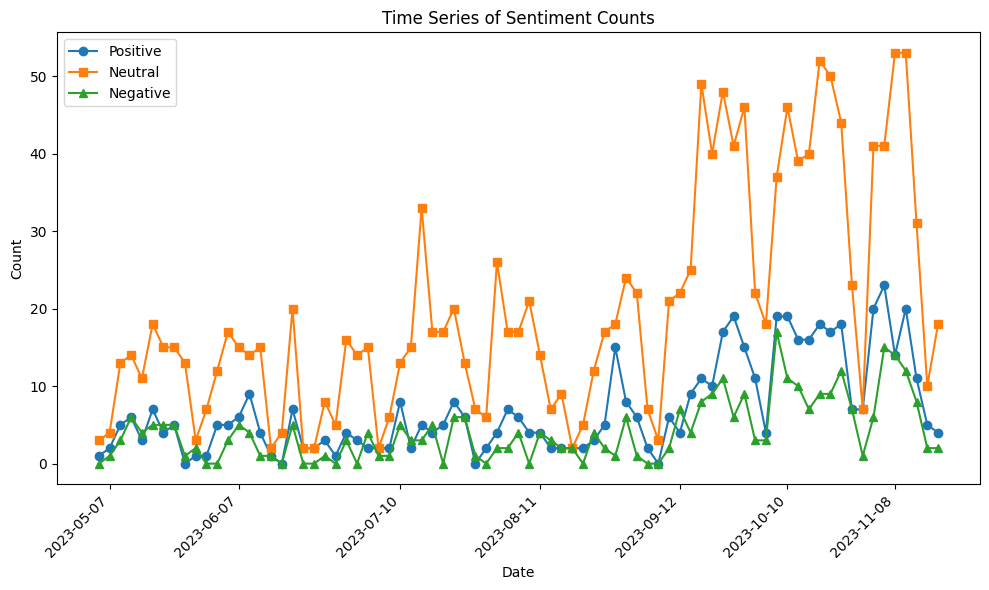

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = negative_counts.index[::len(negative_counts) // num_dates_to_display]

# Plot each variable as a line on the graph
plt.plot(sentiment_counts.index, sentiment_counts['Positive'], label='Positive', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['Neutral'], label='Neutral', marker='s')
plt.plot(sentiment_counts.index, sentiment_counts['Negative'], label='Negative', marker='^')

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = negative_counts.index[::len(negative_counts) // num_dates_to_display]

# Set x-axis ticks
plt.xticks(selected_dates, rotation=45, ha='right')  # Rotate the labels for better readability

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Sentiment Counts')
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### SA NO.1 Results Marker Plot

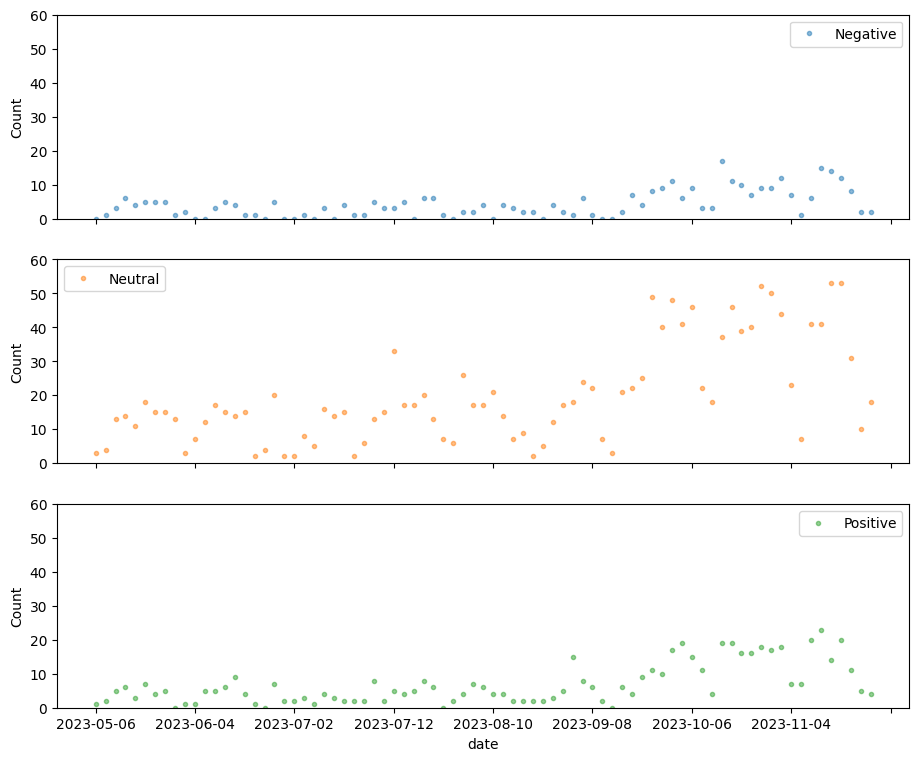

In [ ]:
# Define the columns to plot
cols_plot = ['Neutral', 'Negative', 'Positive']

# Plot dot plots for each column
axes = sentiment_counts.plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

# Set labels for y-axis
for ax in axes:
    ax.set_ylabel('Count')
    ax.set_ylim(0, 60)  # Adjust the y-axis limits according to your data range

# Show the plots
plt.show()

### SA NO.1 Results Cumulative Chart

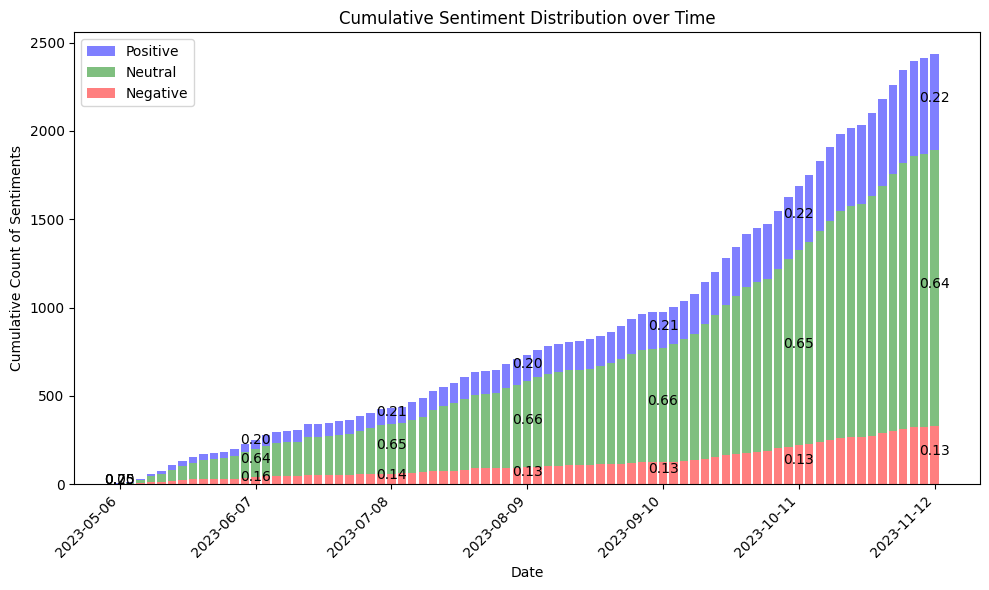

In [ ]:
# Cumulate the sentiment counts over time
cumulative_counts = sentiment_counts.cumsum()

# Plot the cumulative bar chart
plt.figure(figsize=(10, 6))

# Plot the cumulative counts for negative sentiment with transparency
bar1 = plt.bar(cumulative_counts.index, cumulative_counts['Negative'], color='red', label='Negative', alpha=0.5)

# Plot the cumulative counts for neutral sentiment on top of negative sentiment with transparency
bar2 = plt.bar(cumulative_counts.index, cumulative_counts['Neutral'], bottom=cumulative_counts['Negative'], color='green', label='Neutral', alpha=0.5)

# Plot the cumulative counts for positive sentiment on top of negative and neutral sentiment with transparency
bar3 = plt.bar(cumulative_counts.index, cumulative_counts['Positive'],
        bottom=cumulative_counts['Negative'] + cumulative_counts['Neutral'], color='blue', label='Positive', alpha=0.5)

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = cumulative_counts.index[::len(cumulative_counts) // num_dates_to_display]

# Calculate and display the proportion of each sentiment category at selected dates
for date in selected_dates:
    total_count = cumulative_counts.loc[date].sum()
    y_position = 0  # Initialize the y-coordinate position for the text label
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        proportion = cumulative_counts.loc[date, sentiment] / total_count
        plt.text(date, y_position + cumulative_counts.loc[date, sentiment] / 2, f'{proportion:.2f}', ha='center', fontsize=10)
        y_position += cumulative_counts.loc[date, sentiment]  # Update the y-coordinate position for the next label

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Sentiments')
plt.title('Cumulative Sentiment Distribution over Time')
plt.xticks(selected_dates, rotation=45, ha='right')  # Rotate the labels for better readability

# Specify the order of labels in the legend
handles = [bar3, bar2, bar1]
labels = ['Positive', 'Neutral', 'Negative']
plt.legend(handles, labels)

# Show the plot
plt.tight_layout()
plt.show()


### SA NO.1 Results 100% Cumulative Chart

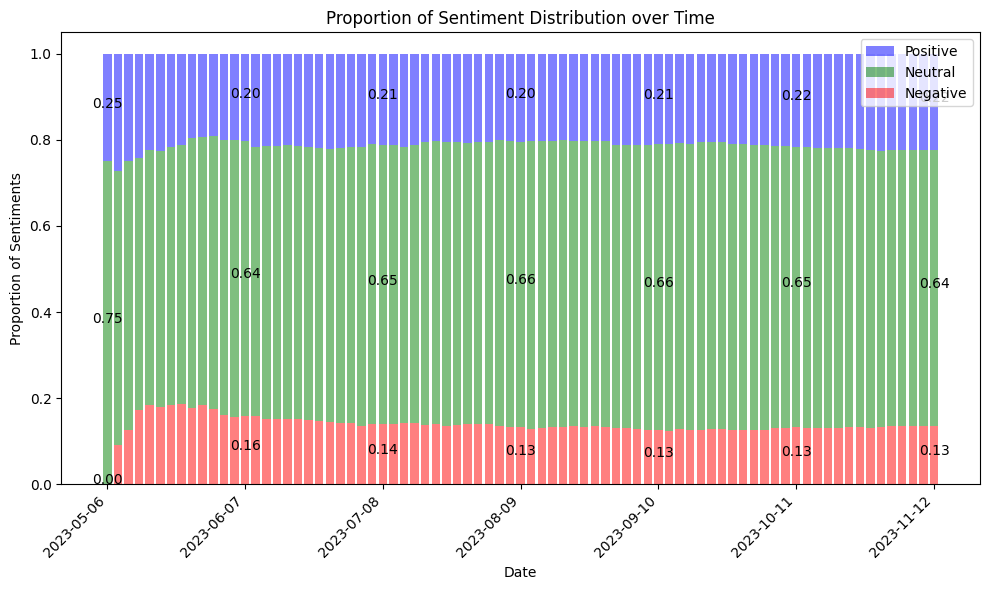

In [ ]:
# Calculate the cumulative sum of sentiment counts
cumulative_counts = sentiment_counts.cumsum()

# Normalize the cumulative counts to obtain proportions
proportions = cumulative_counts.div(cumulative_counts.sum(axis=1), axis=0)

# Plot the 100% stacked vertical bar chart
plt.figure(figsize=(10, 6))

# Plot the bars for negative sentiment with transparency
bar1 = plt.bar(proportions.index, proportions['Negative'], color='red', label='Negative', alpha=0.5)

# Plot the bars for neutral sentiment on top of negative sentiment with transparency
bar2 = plt.bar(proportions.index, proportions['Neutral'], bottom=proportions['Negative'], color='green', label='Neutral', alpha=0.5)

# Plot the bars for positive sentiment on top of negative and neutral sentiment with transparency
bar3 = plt.bar(proportions.index, proportions['Positive'],
        bottom=proportions['Negative'] + proportions['Neutral'], color='blue', label='Positive', alpha=0.5)

# Select only a specific number of dates to display
num_dates_to_display = 6
selected_dates = proportions.index[::len(proportions) // num_dates_to_display]

# Calculate and display the proportion of each sentiment category at selected dates
for date in selected_dates:
    total_count = proportions.loc[date].sum()
    y_position = 0  # Initialize the y-coordinate position for the text label
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        proportion = proportions.loc[date, sentiment]
        plt.text(date, y_position + proportion / 2, f'{proportion:.2f}', ha='center', fontsize=10)
        y_position += proportion  # Update the y-coordinate position for the next label

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Proportion of Sentiments')
plt.title('Proportion of Sentiment Distribution over Time')

# Specify the order of labels in the legend to match the bar order
handles = [bar3, bar2, bar1]
labels = ['Positive', 'Neutral', 'Negative']
plt.legend(handles, labels)

# Show the plot
plt.xticks(selected_dates, rotation=45, ha='right')  # Rotate the labels for better readability
plt.tight_layout()
plt.show()

### SA No.1 Results Heatmap

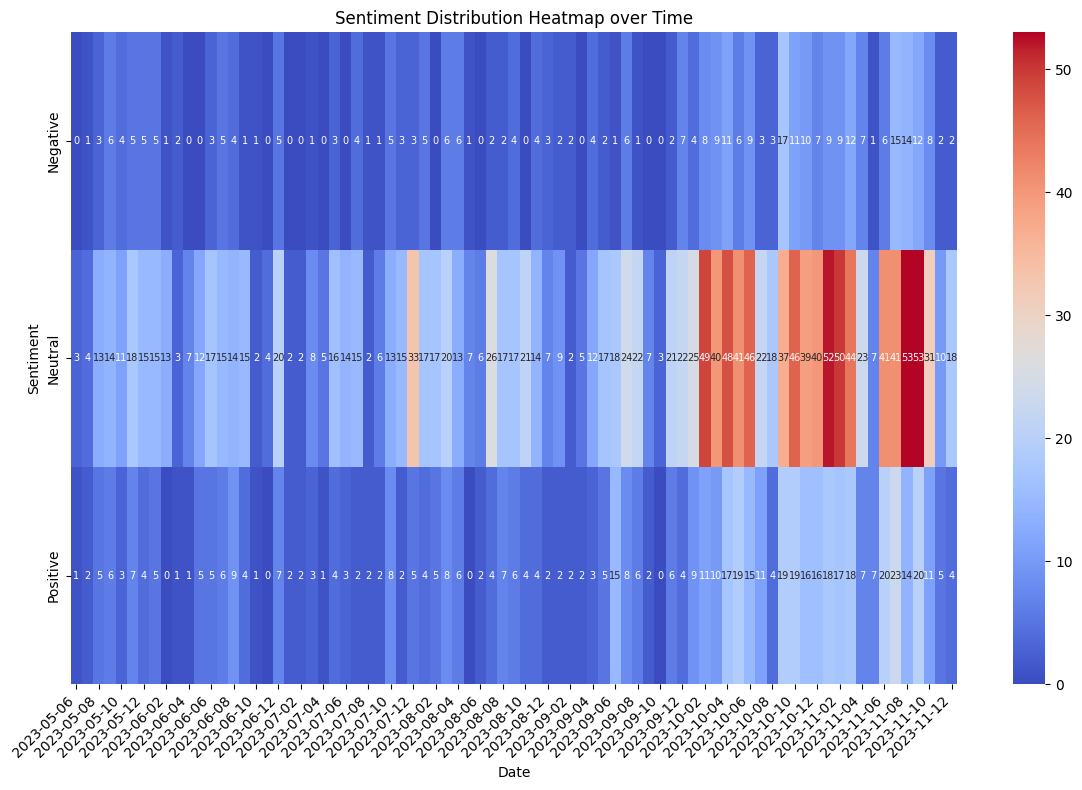

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create the heatmap with adjusted font size
sns.heatmap(sentiment_counts.T, cmap='coolwarm', annot=True, fmt='g', annot_kws={"size": 7})

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution Heatmap over Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Summary:
+ While changes in sentiment distributions are observed, further investigation and contextual information are essential for a nuanced understanding of sentiment trends and their underlying drivers.

## SA No.2 - TextBlob

In [ ]:
# https://textblob.readthedocs.io/en/dev/

In [ ]:
# example
text = df_english['News Article'][77]
TB = TextBlob(text)
print(text)
print(' --- '*80)
print(TB.sentiment)
print(' --- '*80)
print(TB.sentiment.polarity)

The Future of AI in Cancer Care - Journal of Clinical Pathways
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 
Sentiment(polarity=0.0, subjectivity=0.125)
 ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --- 
0.0


In [ ]:
# polarity range from -1 to 1
# define a funtion to read through the entire df
def TextBlob_Analyze(text):
   TB = TextBlob(text)
   sentiment_polarity = TB.sentiment.polarity
   if sentiment_polarity > 0:
    return 'Positive'
   elif sentiment_polarity < 0:
    return 'Negative'
   else:
    return 'Neutral'

### test on uncleaned testing dataset

In [ ]:
df_SA2 = df_english.copy()
df_SA2['Sentiment'] = df_english['News Article'].apply(TextBlob_Analyze)
df_SA2.head()

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,Sentiment
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,False,News Outlet,https://www.aninews.in/news/world/middle-east/...,www.aninews.in,www,4,in,128,[],Negative
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,True,Press Release Service,https://nationalmortgageprofessional.com/news/...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart'],Positive
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,False,News Outlet,https://seattlespectator.com/2023/10/04/how-th...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']",Neutral
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,Is AI a Master or Slave? - Namibian,28,8,Tuesday,...,False,Other,https://www.namibian.com.na/is-ai-a-master-or-...,www.namibian.com.na,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He...",Neutral
5,Artificial Intelligence Meets CRISPR: The Rise...,https://news.google.com/rss/articles/CBMidmh0d...,2023-07-03,SciTechDaily,US,en,Artificial Intelligence Meets CRISPR: The Rise...,71,12,Monday,...,False,News Outlet,https://scitechdaily.com/artificial-intelligen...,scitechdaily.com,scitechdaily,2,com,118,['Columbia University'],Negative


### test on cleaned testing dataset

In [ ]:
# repeat steps above
df_SA2_1 = df_comment_cleaned.copy()
df_SA2_1['Sentiment'] = df_comment_cleaned['Comment'].apply(TextBlob_Analyze)
df_SA2_1.head()

,Comment,Sentiment
0,iran use artifici intellig maxim suppress exp...,Neutral
1,mortgag lender see ai key oper effici nation ...,Neutral
2,threat ai coincid writer strike spectat,Neutral
3,ai master slave namibian,Neutral
4,artifici intellig meet crispr rise precis rna...,Neutral


### SA NO.2 Results Pie Chart

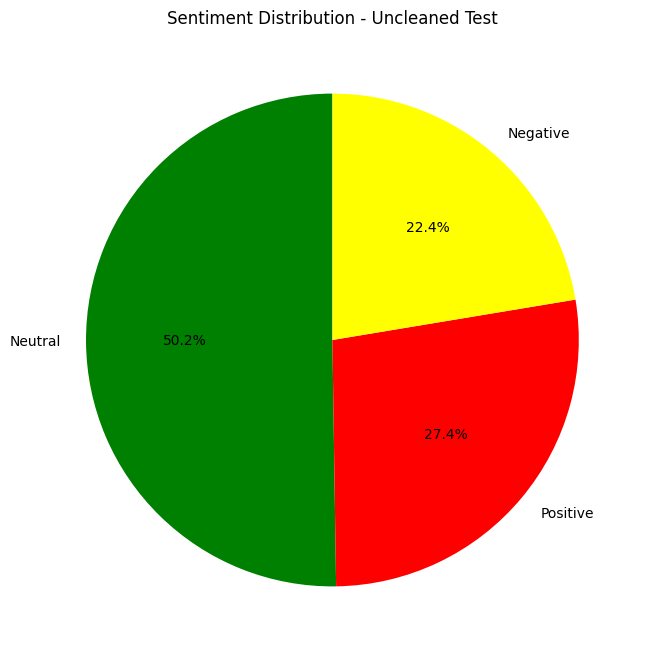

In [ ]:
# pie chart displaying over sentiment results
# import matplotlib.pyplot as plt
sentiment_counts = df_SA2['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
plt.title('Sentiment Distribution - Uncleaned Test')
plt.savefig('Result_2 - TextBlob.png')
plt.show()

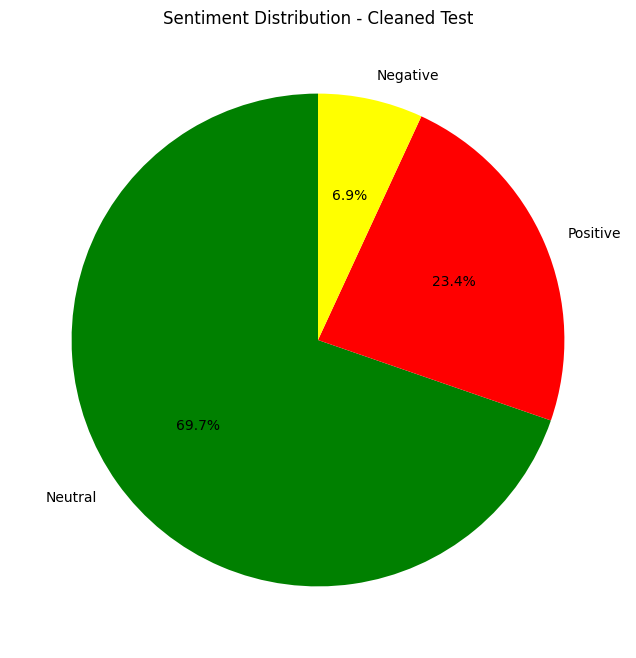

In [ ]:
# pie chart displaying over sentiment results
# import matplotlib.pyplot as plt
sentiment_counts = df_SA2_1['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
plt.title('Sentiment Distribution - Cleaned Test')
plt.savefig('Result_2_clean - TextBlob.png')
plt.show()

## SA No.3 - ML Model 1

### Prepare train_1 dataframe

In [ ]:
# encoding with uft-8 doesn't work on train_1, use one of the following encoding methods
# train_1 = pd.read_csv('train_1.csv', encoding = 'ISO-8859-1')
# train_1 = pd.read_csv('train_1.csv', encoding = 'unicode_escape')
train_1 = pd.read_csv('train_1.csv', encoding = 'unicode_escape')
train_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
# we only need 'text' and 'sentiment' columns
train_1 = train_1.drop(columns=['textID','selected_text','Time of Tweet','Age of User','Country','Population -2020','Land Area (Km²)','Density (P/Km²)'])
train_1.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
# see how many level of sentiment there are in train_1
print('The sentiments are:', train_1['sentiment'].unique())
print('\nLevels of sentiments:',train_1['sentiment'].nunique())

The sentiments are: ['neutral' 'negative' 'positive']

Levels of sentiments: 3


Since train_1 has three levels of sentiments, model_1 is also going to yield three levels of sentiments

In [ ]:
# from info() above, we can see there is one missing value in text column
# check for missing value (NaN) to ensure models can run
train_1.isnull().sum()

text         1
sentiment    0
dtype: int64

In [ ]:
# locate the missing value
missing_value = train_1.isnull()
missing_row = train_1[missing_value.any(axis=1)] # check rows
missing_column = train_1.columns[missing_value.any()] # check columns

print('Rows with missing values:')
print(missing_row)
print('\n',missing_row.index)
print('\nColumns with missing values:')
print(missing_column)

Rows with missing values:
    text sentiment
314  NaN   neutral

 Int64Index([314], dtype='int64')

Columns with missing values:
Index(['text'], dtype='object')


In [ ]:
train_1.iloc[missing_row.index]

,text,sentiment
314,NaN,neutral


In [ ]:
# drop the row with missing value
train_1 = train_1.drop(missing_row.index)
train_1.isnull().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
# expand contraction in sentences for better training result
# !pip install contractions
# import contractions

### this function is already defined in testing data cleaning process ###
# def expand_contractions(sentence):
    # expanded_sentence = contractions.fix(sentence)
    # return expanded_sentence

train_1['text_formalized'] = train_1['text'].apply(expand_contractions)
train_1.head()

,text,sentiment,text_formalized
0,"I`d have responded, if I were going",neutral,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...,negative,my boss is bullying me...
3,what interview! leave me alone,negative,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of ****, why couldn`t they put them on t..."


In [ ]:
# remove puntuations and other meaningless characters
# copied from in-class example
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

train_1['text_cleaned'] = train_1['text_formalized'].apply(preprocessor)
train_1.head()

,text,sentiment,text_formalized,text_cleaned
0,"I`d have responded, if I were going",neutral,"I`d have responded, if I were going",i d have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,negative,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of ****, why couldn`t they put them on t...",sons of why couldn t they put them on the rel...


In [ ]:
# check for missing value one last time
train_1.info()
print('---'*80)
if (train_1.isnull().values.any() == False):
    print('No missing value found in data')
else:
    print('MISSING VALUE IN DATA')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             27480 non-null  object
 1   sentiment        27480 non-null  object
 2   text_formalized  27480 non-null  object
 3   text_cleaned     27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
No missing value found in data


In [ ]:
train_1.head()

,text,sentiment,text_formalized,text_cleaned
0,"I`d have responded, if I were going",neutral,"I`d have responded, if I were going",i d have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego!!!,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me...,my boss is bullying me
3,what interview! leave me alone,negative,what interview! leave me alone,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of ****, why couldn`t they put them on t...",sons of why couldn t they put them on the rel...


### EDA - train_1

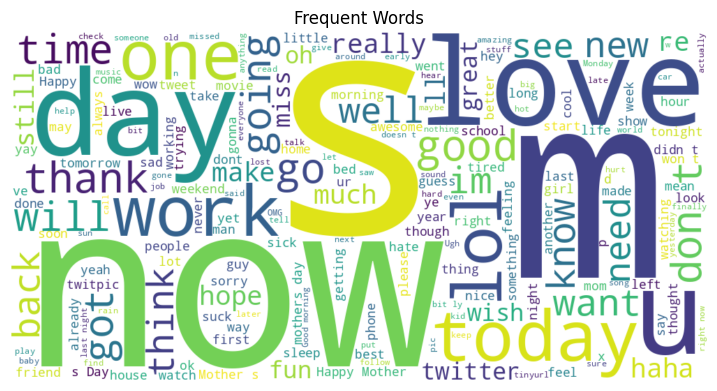

In [ ]:
# since we are using STOPWORDS in wordcloud package, let's plot based on 'text' instead of 'text_cleaned'
# from wordcloud import WordCloud, STOPWORDS
wordcloud_train_1 = WordCloud(stopwords = STOPWORDS,
                              width=1000,
                              height=500,
                              background_color='white').generate(" ".join(train_1['text']))
plt.figure(figsize = (9,8))
plt.imshow(wordcloud_train_1, interpolation='bilinear')
plt.title("Frequent Words")
plt.axis("off")
plt.savefig('WordCloud - training.png')
plt.show()

In [ ]:
# modified from ChatGPT solution
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB

X = train_1['text_cleaned']
y = train_1['sentiment']

# extract feature vectors
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# mapping sentiments to index
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
y_encoded = y.map(label_mapping)

NameError: name 'train_1' is not defined

In [ ]:
# use 90% to train and 10% to test model
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.1, random_state=88)
# constructing model
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
# accuracy test
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

In [ ]:
# predict results using this model
# use cleaned comments from Preparation step
comment_cleaned_vectorized = vectorizer.transform(comment_cleaned_list)
predictions = model.predict(comment_cleaned_vectorized)

In [ ]:
type(predictions)

In [ ]:
# convert 0,1,2 to corresponding sentiments:'positive', 'negative', 'neutral'
sentiment_mapping = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}
convert_sentiment = np.vectorize(lambda x: sentiment_mapping[x])
converted_array = convert_sentiment(predictions)

# convert array to list and add back to a copy of df_english_comment
df_SA3 = df_english.copy()
converted_list = converted_array.tolist()
df_SA3['Sentiment'] = converted_list
df_SA3.head()

### SA No.3 Results Pie Chart

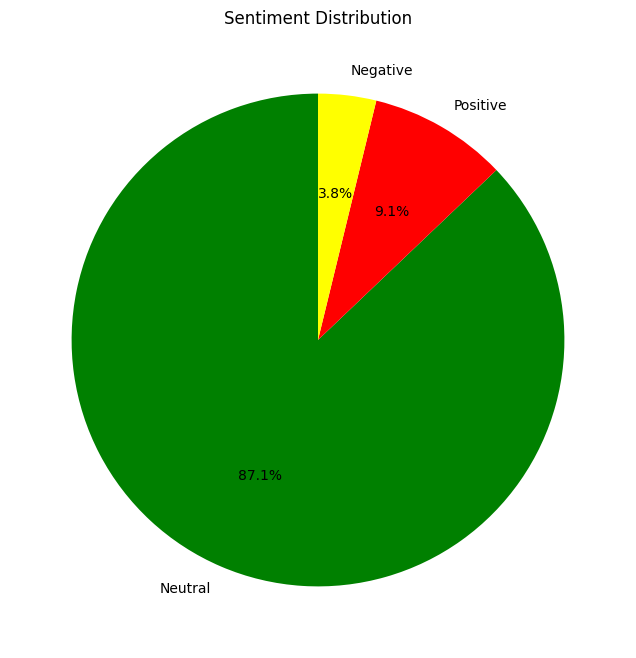

In [ ]:
# pie chart displaying over sentiment results
# import matplotlib.pyplot as plt
sentiment_counts = df_SA3['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
plt.title('Sentiment Distribution')
plt.savefig('Result_3 - Naïve Bayes classifier.png')
plt.show()

## SA No.4 - ML Model 2

In [ ]:
# avoid over importing
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# decide training and testing portion
X_train, X_test, y_train, y_test = train_test_split(train_1['text_cleaned'], train_1['sentiment'], test_size=0.1, random_state=99)

# use the feature extraction as model 1
# extract feature vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# constructing SVM model
# svm_model = SVC()
svm_model = SVC(kernel='linear', random_state=99)
svm_model.fit(X_train_vectorized, y_train)

SVC(kernel='linear', random_state=99)

In [ ]:
# evaluate accuracy
y_pred = svm_model.predict(X_test_vectorized)
accuracy_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy_test:.2f}')
print('Classification Report:\n', report)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.63      0.67       755
     neutral       0.67      0.76      0.72      1164
    positive       0.78      0.73      0.75       829

    accuracy                           0.72      2748
   macro avg       0.73      0.71      0.71      2748
weighted avg       0.72      0.72      0.71      2748



In [ ]:
# predict for testing dataset
comment_cleaned_vectorized = vectorizer.transform(comment_cleaned_list)
predictions_SVM = svm_model.predict(comment_cleaned_vectorized)

In [ ]:
type(predictions_SVM)

numpy.ndarray

In [ ]:
# actually we do not have to convert array to_list to add it to df_SA4
df_SA4 = df_english.copy()
df_SA4['Sentiment'] = predictions_SVM
df_SA4.head()

,News Article,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,is_holiday,source_type,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,Sentiment
0,Iran uses Artificial Intelligence for maximizi...,https://news.google.com/rss/articles/CBMigAFod...,2023-05-07,ANI News,US,en,Iran uses Artificial Intelligence for maximizi...,70,11,Sunday,...,False,News Outlet,https://www.aninews.in/news/world/middle-east/...,www.aninews.in,www,4,in,128,[],neutral
1,Mortgage Lenders See AI As Key To Operational ...,https://news.google.com/rss/articles/CBMiYGh0d...,2023-10-09,National Mortgage Professional,US,en,Mortgage Lenders See AI As Key To Operational ...,77,13,Monday,...,True,Press Release Service,https://nationalmortgageprofessional.com/news/...,nationalmortgageprofessional.com,nationalmortgageprofessional,2,com,96,['Christine Stuart'],neutral
2,How the Threat of AI Coincided with the Writer...,https://news.google.com/rss/articles/CBMiX2h0d...,2023-10-04,The Spectator,US,en,How the Threat of AI Coincided with the Writer...,59,13,Wednesday,...,False,News Outlet,https://seattlespectator.com/2023/10/04/how-th...,seattlespectator.com,seattlespectator,5,com,95,"['Hannah Mwangi', 'Volunteer Reporter']",neutral
4,Is AI a Master or Slave? - Namibian,https://news.google.com/rss/articles/CBMiNGh0d...,2023-10-03,Namibian,US,en,Is AI a Master or Slave? - Namibian,28,8,Tuesday,...,False,Other,https://www.namibian.com.na/is-ai-a-master-or-...,www.namibian.com.na,www,2,na,52,"['Joschka Fischer', 'Please Enter Your Name He...",neutral
5,Artificial Intelligence Meets CRISPR: The Rise...,https://news.google.com/rss/articles/CBMidmh0d...,2023-07-03,SciTechDaily,US,en,Artificial Intelligence Meets CRISPR: The Rise...,71,12,Monday,...,False,News Outlet,https://scitechdaily.com/artificial-intelligen...,scitechdaily.com,scitechdaily,2,com,118,['Columbia University'],neutral


### SA No.4 Results Pie Chart

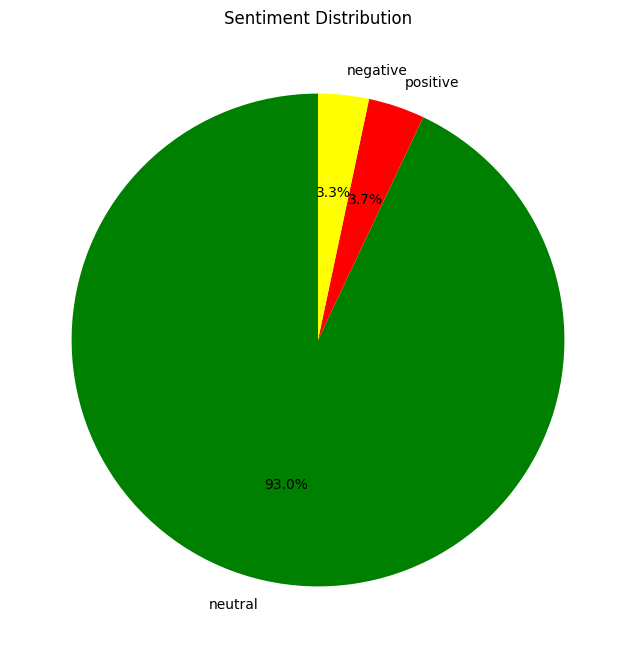

In [ ]:
# pie chart displaying over sentiment results
import matplotlib.pyplot as plt
sentiment_counts = df_SA4['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
plt.title('Sentiment Distribution')
plt.savefig('Result_4 - SVM.png')
plt.show()

# **4. Exploratory Data Analysis (EDA)** #
+ Generate basic statistics about the text data, such as word frequency distributions.
+ Create visualizations like word clouds, frequency histograms, and bar charts to explore the data.
+ Use N-grams (unigrams, bigrams, trigrams) to understand common phrases and expressions.

## Results for Word Clouds

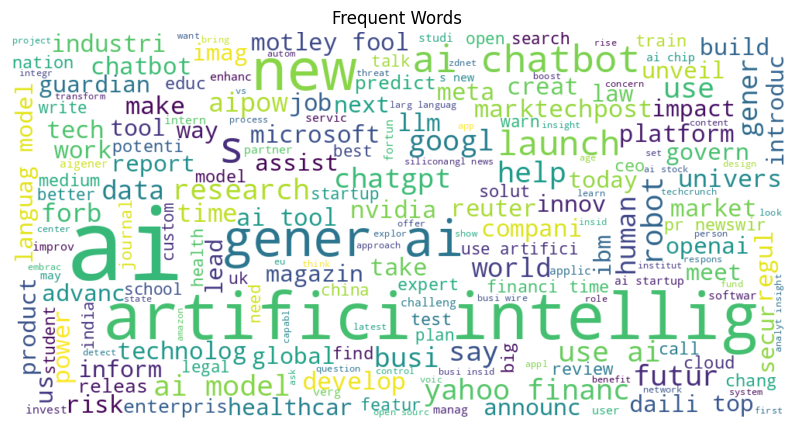

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud_Chatgpt = WordCloud(stopwords = STOPWORDS,
                              width=1000,
                              height=500,
                              background_color='white').generate(' '.join(df_comment_cleaned['Comment']))
plt.figure(figsize = (10,8))
plt.imshow(wordcloud_Chatgpt, interpolation='bilinear')
plt.title('Frequent Words')
plt.axis("off")
plt.savefig('WordCloud - testing.png')
plt.show()

## Results for Frequency Table

In [ ]:
# Count word frequencies
word_freq = Counter(' '.join(df_comment_cleaned['Comment']).split())

# Convert word frequencies to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 frequent words
print(word_freq_df.head(10))

# Optionally, save the DataFrame to a CSV file
word_freq_df.to_csv('word_frequency.csv', index=False)

         Word  Frequency
12         ai       2397
2    artifici        509
3    intellig        502
175     gener        356
33          s        281
8        news        254
44        new        251
103   chatbot        217
1         use        197
57          ’        151


Results for Frequency Histogram

## Results Violin and Box plot

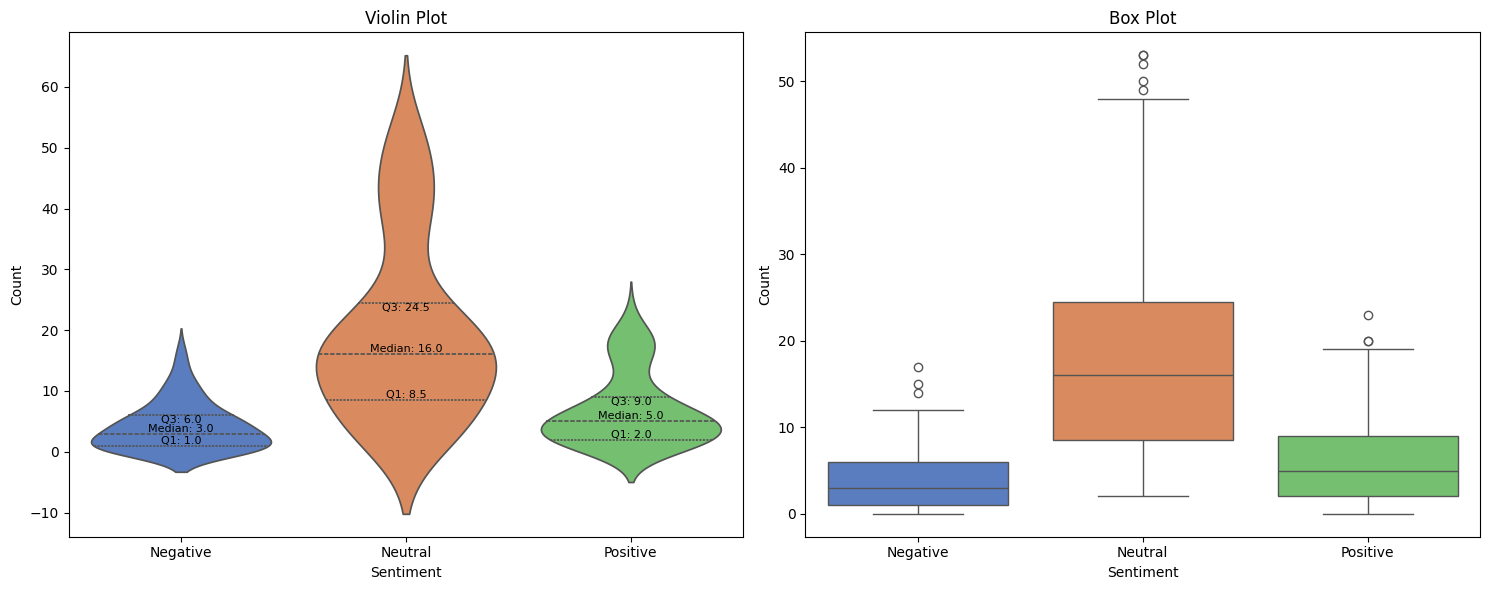

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot
sns.violinplot(data=sentiment_counts, palette="muted", inner="quartile", ax=axes[0])
axes[0].set_title('Violin Plot')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Add labels for median and quartiles on violin plot
for i, col in enumerate(sentiment_counts.columns):
    median_val = sentiment_counts[col].median()
    q1 = sentiment_counts[col].quantile(0.25)
    q3 = sentiment_counts[col].quantile(0.75)
    axes[0].text(i, q1, f'Q1: {q1:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    axes[0].text(i, median_val, f'Median: {median_val:.1f}', horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    axes[0].text(i, q3, f'Q3: {q3:.1f}', horizontalalignment='center', verticalalignment='top', fontsize=8)

# Box plot
sns.boxplot(data=sentiment_counts, palette="muted", ax=axes[1])
axes[1].set_title('Box Plot')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Results for Frequency Histogram with curve line

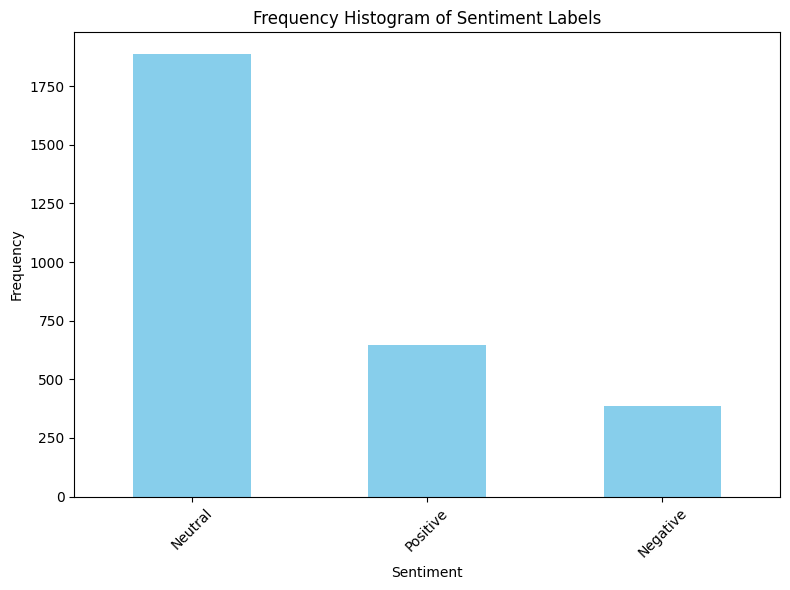

In [ ]:
# Plotting a frequency histogram of sentiment labels
plt.figure(figsize=(8, 6))
df_SA1_1['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency Histogram of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

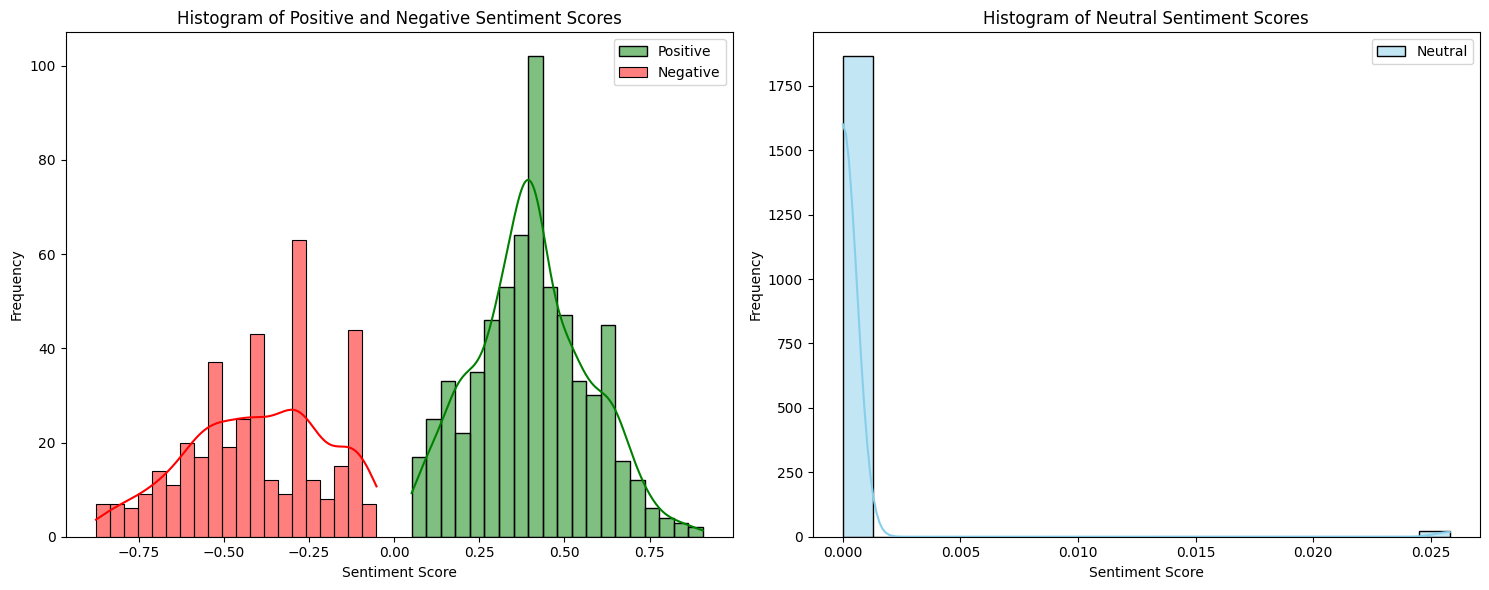

In [ ]:
# Create a figure and axes with a 1x2 layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Positive and negative sentiment histogram with KDE plot
sns.histplot(positive_data, bins=20, color='green', kde=True, label='Positive', ax=axes[0])
sns.histplot(negative_data, bins=20, color='red', kde=True, label='Negative', ax=axes[0])

# Add labels and title for the first subplot
axes[0].set_title('Histogram of Positive and Negative Sentiment Scores')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Neutral sentiment histogram with KDE plot
sns.histplot(neutral_data, bins=20, color='skyblue', kde=True, label='Neutral', ax=axes[1])

# Add labels and title for the second subplot
axes[1].set_title('Histogram of Neutral Sentiment Scores')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# **5. Topic Modeling and Theme Synthesis** #
+ Apply topic modeling techniques like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) to identify dominant topics in the news headlines.
+ Explore the interconnections between topics to synthesize overarching themes.
+ Visualize topic distributions and topic-word associations using tools like word clouds and network graphs.

## Results Comparison

In [ ]:
print(df_english.info())
print('---'*80)
print(df_comment_cleaned.info())
print('---'*80)
print(train_1['text'].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 3499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   News Article                2918 non-null   object
 1   link                        2918 non-null   object
 2   date                        2918 non-null   object
 3   source                      2918 non-null   object
 4   country                     2918 non-null   object
 5   language                    2918 non-null   object
 6   translated_title            2918 non-null   object
 7   number_of_characters_title  2918 non-null   int64 
 8   number_of_words_title       2918 non-null   int64 
 9   day_of_week                 2918 non-null   object
 10  month                       2918 non-null   int64 
 11  year                        2918 non-null   int64 
 12  quarter                     2918 non-null   int64 
 13  is_weekend                  2918 non-null   bool

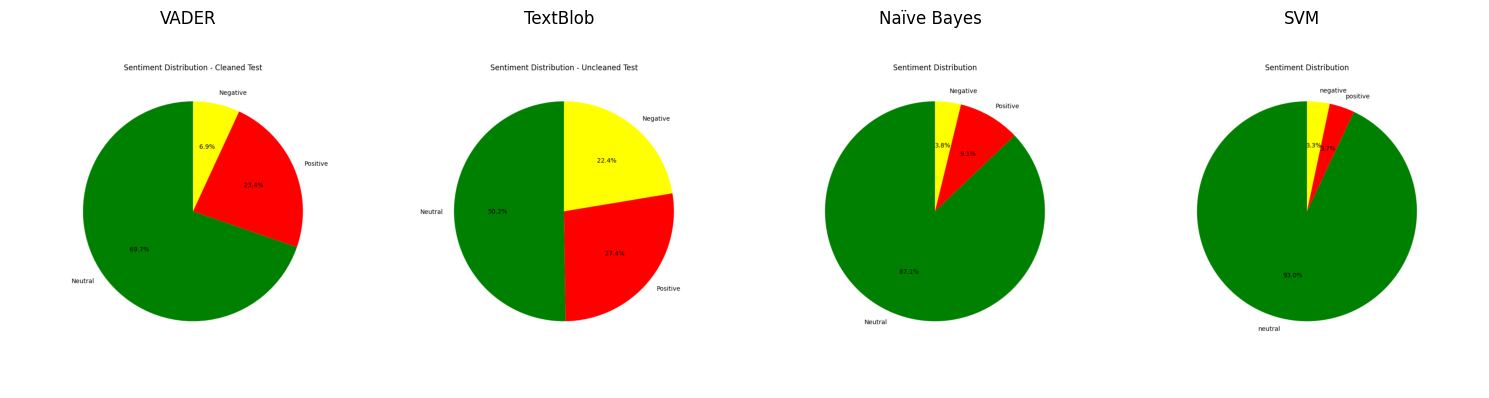

In [ ]:
import matplotlib.image as mpimg

pies = ['Result_2_clean - TextBlob.png',
        'Result_2 - TextBlob.png',
        'Result_3 - Naïve Bayes classifier.png',
        'Result_4 - SVM.png']

pies_names = ['VADER','TextBlob','Naïve Bayes','SVM']

fig, axes = plt.subplots(1, 4, figsize=(15, 8)) # 1 row and 4 columns

for i, (paths, names) in enumerate(zip(pies, pies_names)):
    four_pies = mpimg.imread(paths)
    axes[i].imshow(four_pies)
    axes[i].axis('off')  # turn off axix for a cleaner view
    axes[i].set_title(names)

plt.tight_layout() # adjust layout to prevent overlapping
plt.savefig('Results Comparison - Uncleaned.png')
plt.show()

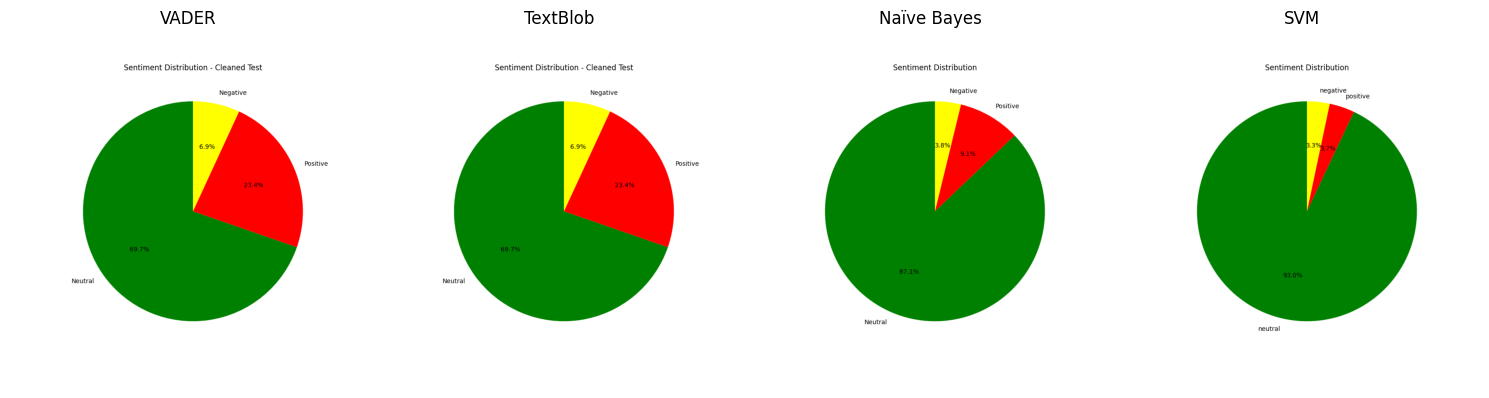

In [ ]:
pies_2 = ['Result_2_clean - TextBlob.png',
        'Result_2_clean - TextBlob.png',
        'Result_3 - Naïve Bayes classifier.png',
        'Result_4 - SVM.png']

pies_names = ['VADER','TextBlob','Naïve Bayes','SVM']

fig, axes = plt.subplots(1, 4, figsize=(15, 8)) # 1 row and 4 columns

for i, (paths, names) in enumerate(zip(pies_2, pies_names)):
    four_pies = mpimg.imread(paths)
    axes[i].imshow(four_pies)
    axes[i].axis('off')  # turn off axix for a cleaner view
    axes[i].set_title(names)

plt.tight_layout() # adjust layout to prevent overlapping
plt.savefig('Results Comparison - cleaned.png')
plt.show()

# **6. Insight and Recommendations** #

**Hyeryeng Shin** I learned there are various ways for data analysis and ifferent data analysis techniques serve distinct purposes. For instance, sentiment analysis offers a quantitative approach by categorizing words into positive, neutral, or negative sentiments, enabling visualization of trends over time and analysis through regression lines to determine significance. On the other hand, exploratory data analysis allows for a more intuitive comparison of word counts, providing insights into the frequency of sentimental words regardless of time changes. Given more time, it would be beneficial to compare the outputs of sentiment analysis models like VADER and TextBlob to understand the impact of different methodologies in the outputs, reinforcing the hypothesis that there is no widespread fear of AI driven by mass media

**Nurul Hoque**

**Jiatong Yang**